# **Iris Dataset ML Classification**

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics

**Load Dataset**

In [ ]:
# Importing the dataset
dataset = pd.read_csv('iris.data')
dataset.columns=["sepal_length","sepal_width","petal_length","petal_width","target"]
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
dataset.shape

(149, 5)

In [ ]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   target        149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [ ]:
dataset['target'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: target, dtype: int64

In [ ]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [ ]:
dataset.fillna(0)

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


**Split Dataset**

In [ ]:
X = dataset.drop('target', axis=1)
y = dataset['target']


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 4)
(30, 4)
(119,)
(30,)


**Feature Scaling**

In [ ]:

from sklearn.preprocessing import StandardScaler
a = StandardScaler()
X_train = a.fit_transform(X_train)
X_test = a.transform(X_test)

**Logistic** **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(X_train,y_train)


LogisticRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [ ]:
dataset.corr()

<ipython-input-17-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


In [ ]:
dataset['target'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: target, dtype: int64

In [ ]:
correlation = dataset['sepal_length'].corr(dataset['petal_length'])
print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.8712829406718027


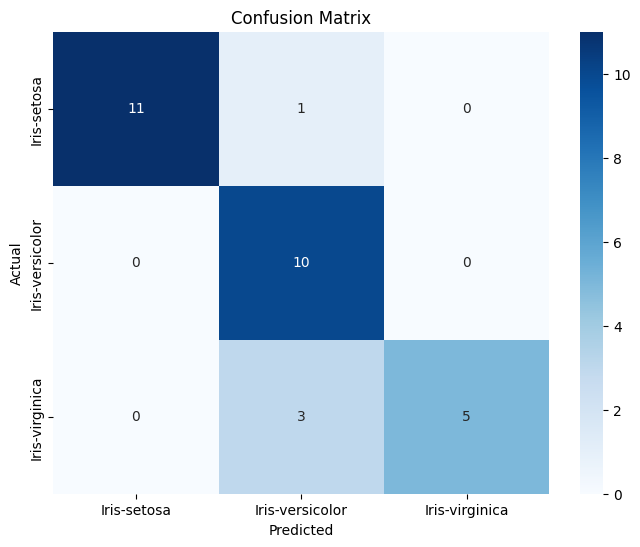

In [ ]:
# Confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=regressor.classes_, yticklabels=regressor.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of the model is:",accuracy*100)

The accuracy of the model is: 86.66666666666667


# **Visualization**

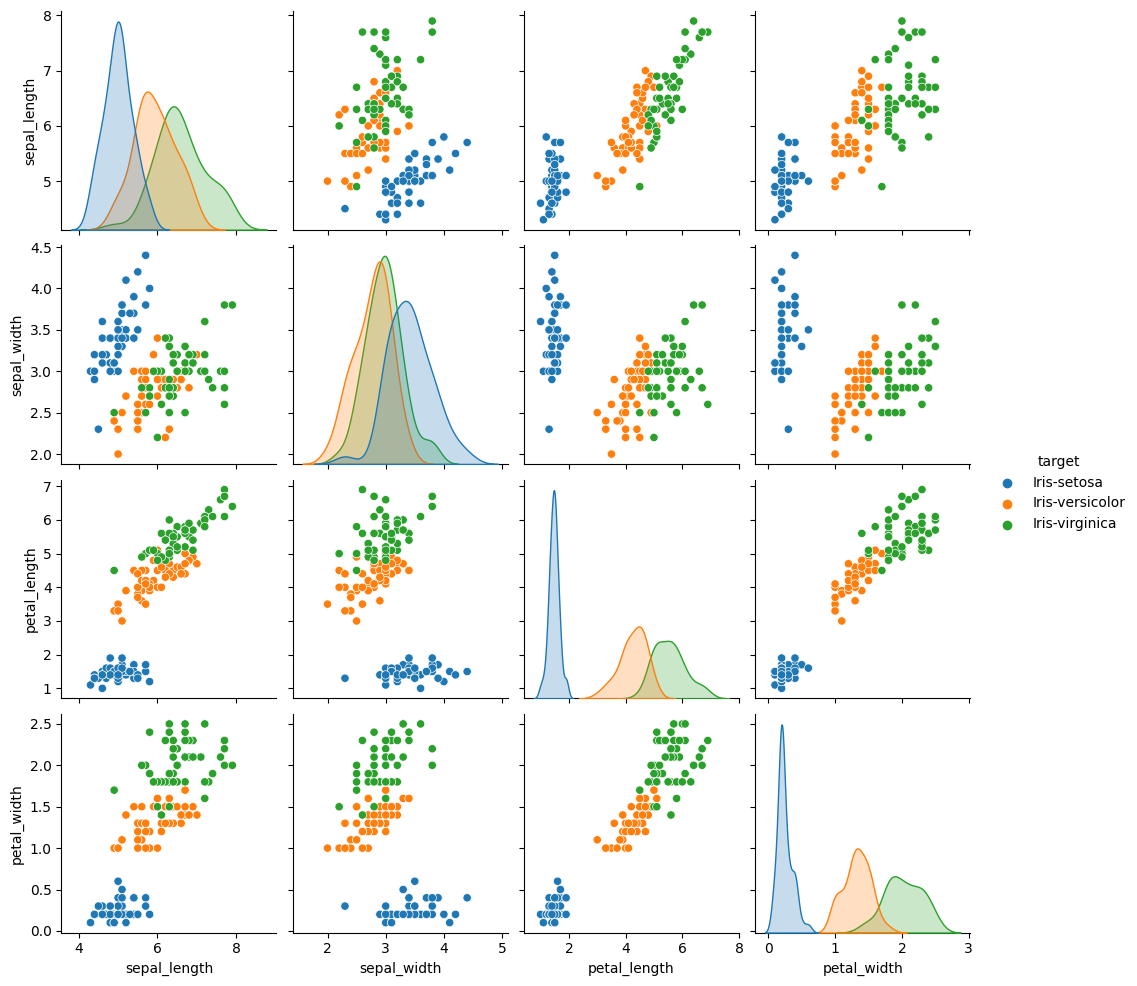

In [ ]:
sns.pairplot(dataset,hue='target')

<ipython-input-20-3ad2545167c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True,cmap='viridis')


<Axes: >

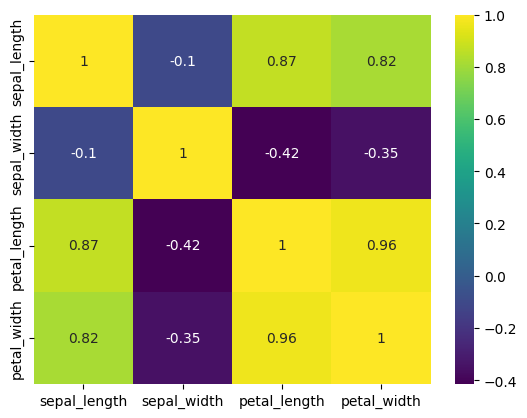

In [ ]:
sns.heatmap(dataset.corr(),annot=True,cmap='viridis')

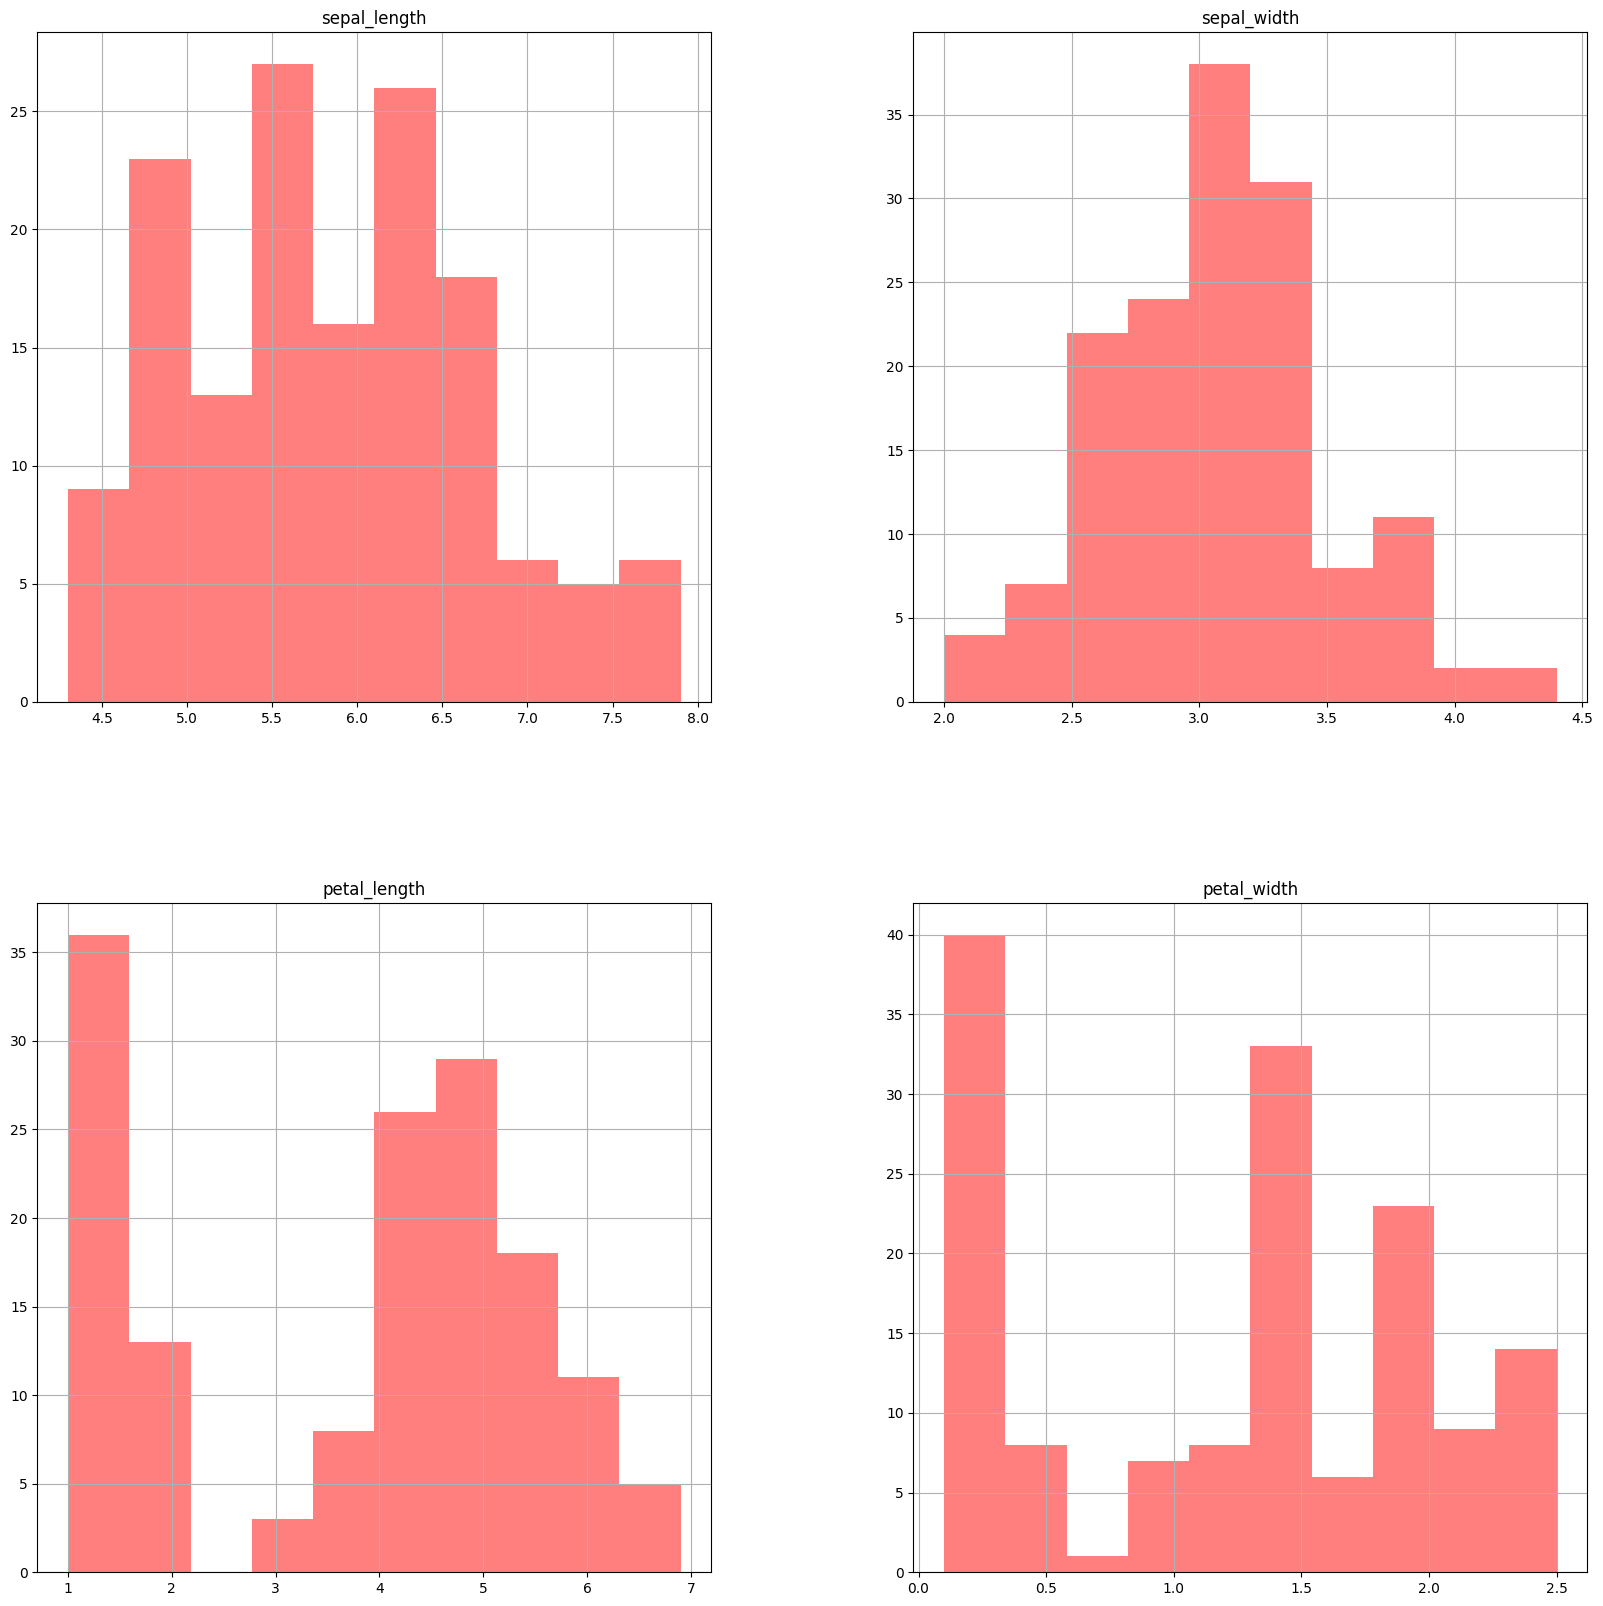

In [ ]:
dataset.hist(alpha=0.5, figsize=(20, 20), color='red')
plt.show()

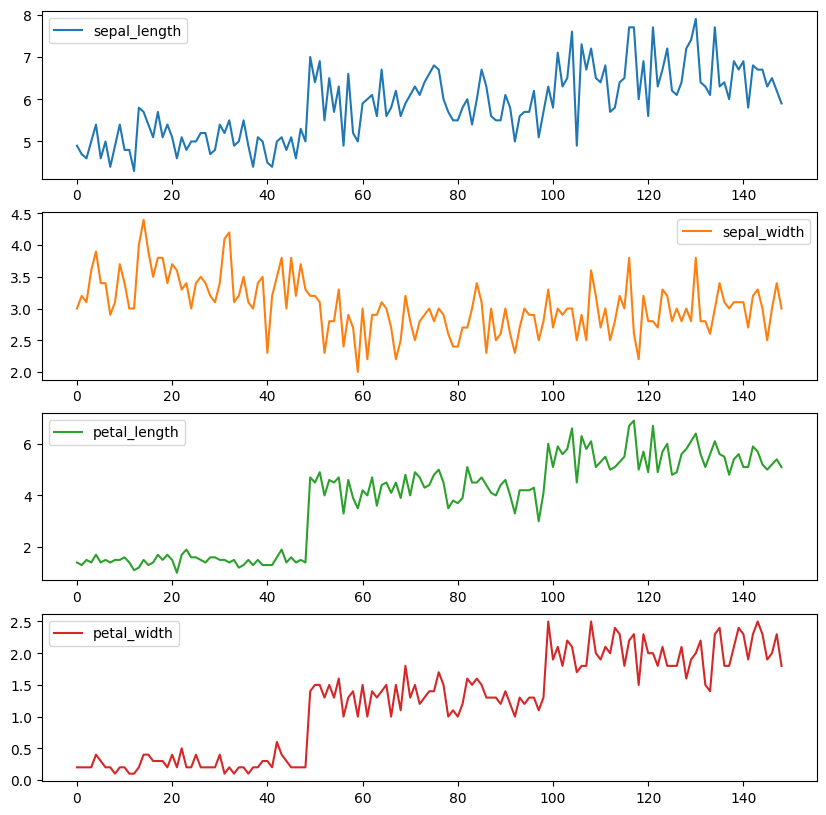

In [ ]:
dataset.plot(subplots=True, figsize=(10, 10), sharex=False, sharey=False)
plt.show()

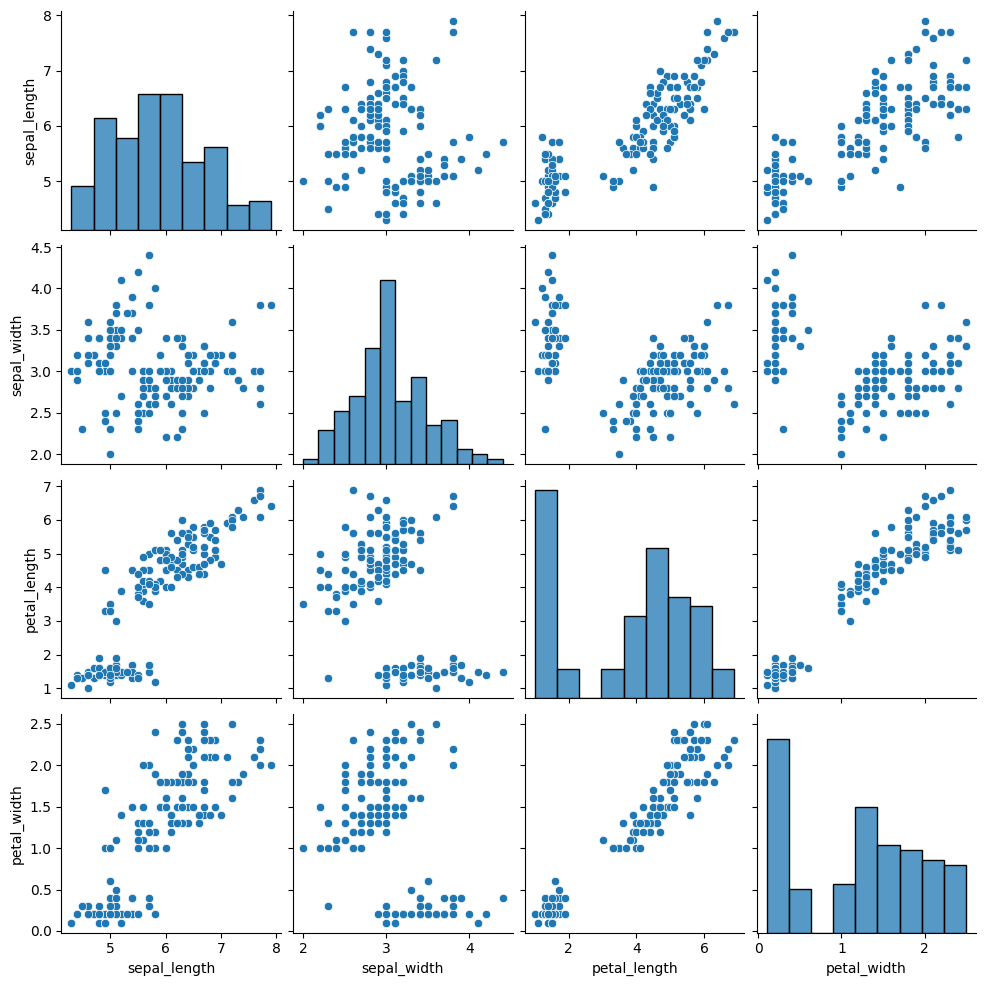

In [ ]:
sns.pairplot(dataset)

<ipython-input-22-c2ef228d7453>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['sepal_length'],kde=False)


<Axes: xlabel='sepal_length'>

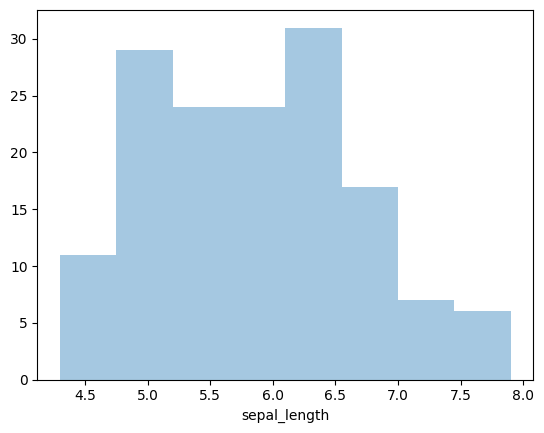

In [ ]:
sns.distplot(dataset['sepal_length'],kde=False)

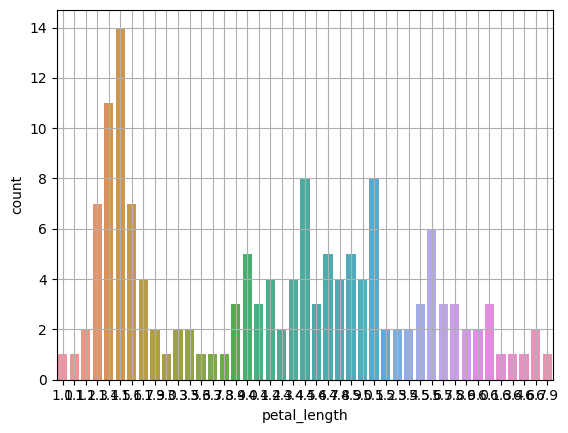

In [ ]:
sns.countplot(x='petal_length',data=dataset)
plt.grid()

<Axes: xlabel='sepal_length', ylabel='petal_length'>

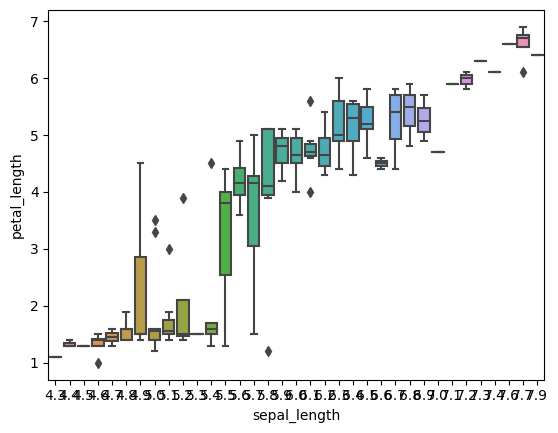

In [ ]:
sns.boxplot(x='sepal_length', y='petal_length', data=dataset)

<Axes: xlabel='petal_length', ylabel='count'>

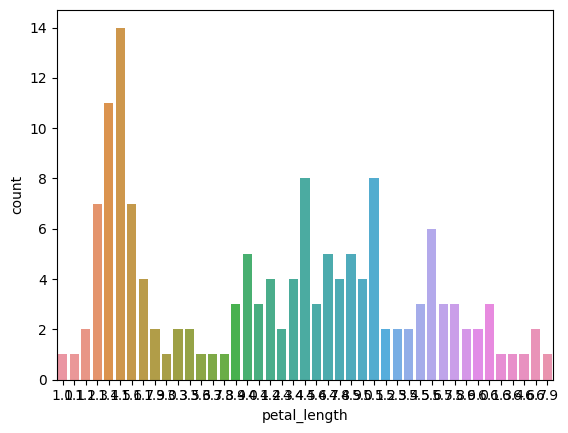

In [ ]:
sns.countplot(x='petal_length',data=dataset)